# Dimentionality Reduction / Factor Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Load the dataset
df=pd.read_csv("pca_student_test_scores.csv")

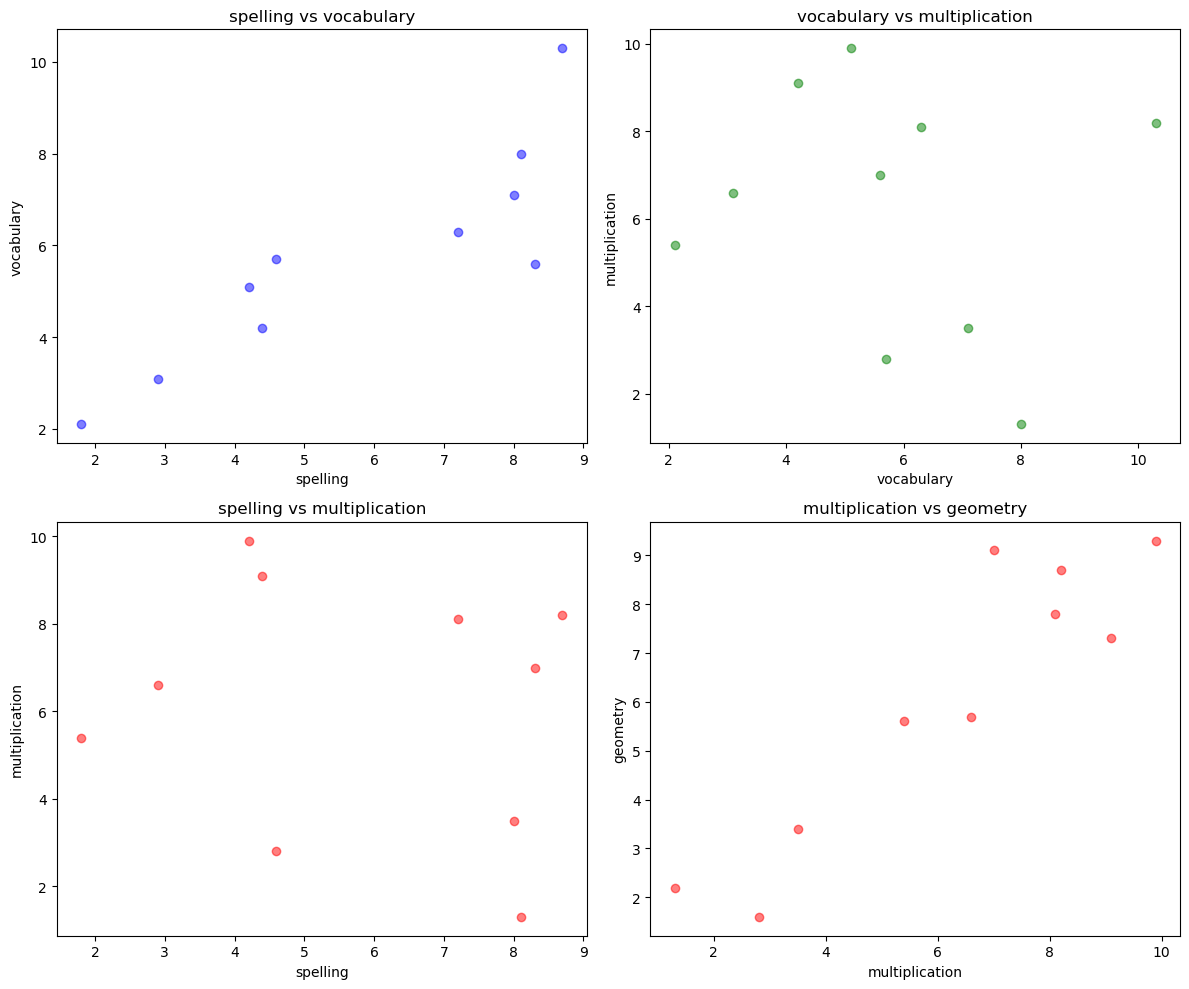

In [14]:
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot spelling vs vocabulary
axs[0,0].scatter(df['spelling'], df['vocabulary'], color='blue', alpha=0.5)
axs[0,0].set_title("spelling vs vocabulary")
axs[0,0].set_xlabel("spelling")
axs[0,0].set_ylabel("vocabulary")


# Plot the vocabulary vs Multiplication
axs[0, 1].scatter(df['vocabulary'], df['multiplication'], color='green', alpha=0.5)
axs[0,1].set_title("vocabulary vs multiplication")
axs[0,1].set_xlabel("vocabulary")
axs[0,1].set_ylabel("multiplication")

# Plot spelling vs multiplication
axs[1,0].scatter(df['spelling'], df['multiplication'], color='red', alpha=0.5)
axs[1,0].set_title("spelling vs multiplication")
axs[1,0].set_xlabel("spelling")
axs[1,0].set_ylabel("multiplication")

# Plot multiplication vs Geometry
axs[1,1].scatter(df['multiplication'], df['geometry'], color='red', alpha=0.5)
axs[1,1].set_title("multiplication vs geometry")
axs[1,1].set_xlabel("multiplication")
axs[1,1].set_ylabel("geometry")

# Adjust the layout
plt.tight_layout()
plt.show()

In [15]:
# Calculate and print correlation matrix
import seaborn as sns
correlation_matrix = df.corr()
print("Correlation Matrix: ")
print(correlation_matrix)

Correlation Matrix: 
                studentID  spelling  vocabulary  multiplication  geometry
studentID        1.000000  0.536095    0.613839        0.622606  0.659517
spelling         0.536095  1.000000    0.875475       -0.163159  0.066004
vocabulary       0.613839  0.875475    1.000000       -0.154746 -0.015261
multiplication   0.622606 -0.163159   -0.154746        1.000000  0.923282
geometry         0.659517  0.066004   -0.015261        0.923282  1.000000


Text(24.0, 0.5, 'geometry')

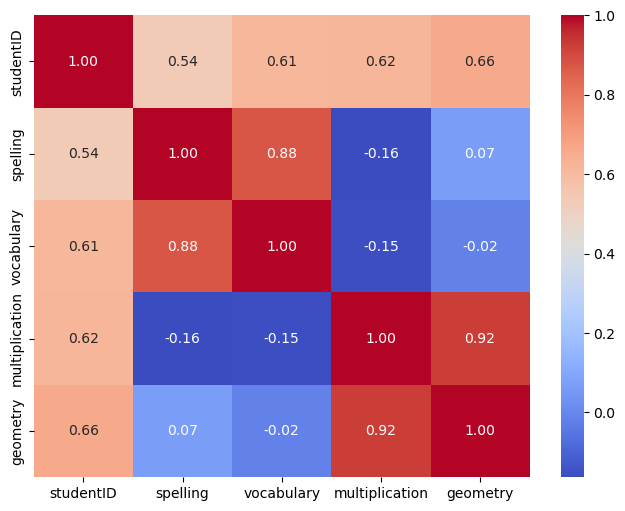

In [16]:
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
axs[1,0].set_title("Correlation Heatmap")
axs[1,0].set_xlabel("multiplication")
axs[1,0].set_ylabel("geometry")

# Doing PCA on diabetes dataset

In [17]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv("diabetes.csv")

In [19]:
# Column to retain
numerical_cols = ['Pregnancies', 'Glucose', 'BloodPressure', "SkinThickness", 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [20]:
# Handling missing values for numerical columns
numerical_data = df[numerical_cols]
imputer_num = SimpleImputer(strategy = 'mean')
numerical_data = imputer_num.fit_transform(numerical_data)
numerical_df = pd.DataFrame(numerical_data, columns = numerical_cols)

In [21]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numerical_df)

In [23]:
# Apply PCA
pca=PCA(3)
X_pca = pca.fit_transform(data_scaled)

In [26]:
# Variance captured by each componenet
explained_variance = pca.explained_variance_ratio_
cummulative_variance = np.cumsum(explained_variance)

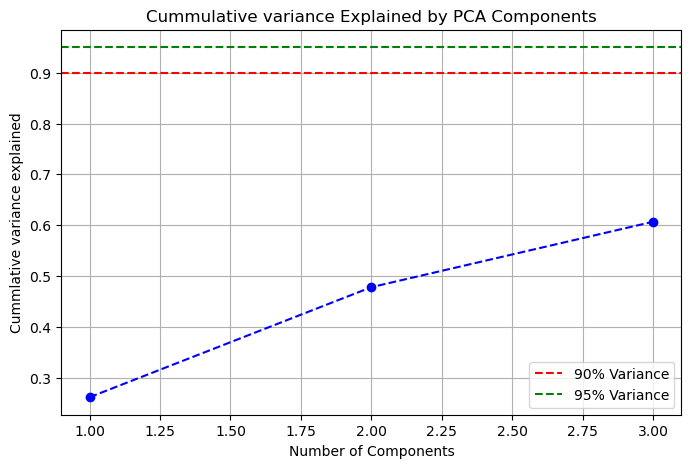

In [27]:
# Plot cummulative variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cummulative_variance) +1) , cummulative_variance, marker = 'o', linestyle = '--', color='b')
plt.title('Cummulative variance Explained by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cummlative variance explained')
plt.axhline(y=0.9, color = 'r', linestyle='--', label='90% Variance')
plt.axhline(y=0.95, color = 'g', linestyle='--', label='95% Variance')
plt.legend()
plt.grid()
plt.show()

In [28]:
# Display results
print("Explained Varience Ratio (for each PC):")
print(explained_variance)

Explained Varience Ratio (for each PC):
[0.26179749 0.21640127 0.12870373]


In [29]:
print("\nCummulative Variance:")
print(cummulative_variance)


Cummulative Variance:
[0.26179749 0.47819876 0.60690249]


In [30]:
# Display loading (contibution of original features to each principal component)
loadings = pd.DataFrame(
    pca.components_.T,   #Transpose to get features as row
    columns = [f'PC{i+1}'  for i in range (pca.n_components_)],
    index=numerical_cols
)

print("\nFeature Loading for Each Principal Component:")
print(loadings.round(3))  # Rounded  for better readability



Feature Loading for Each Principal Component:
                            PC1    PC2    PC3
Pregnancies               0.128  0.594  0.013
Glucose                   0.393  0.174 -0.468
BloodPressure             0.360  0.184  0.535
SkinThickness             0.440 -0.332  0.238
Insulin                   0.435 -0.251 -0.337
BMI                       0.452 -0.101  0.362
DiabetesPedigreeFunction  0.271 -0.122 -0.433
Age                       0.198  0.621 -0.075


# Decision Tree

In [31]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [32]:
df = pd.read_csv("Bank Customer Churn Prediction.csv")


In [33]:
# Drop rows with missing values
df = df.dropna()
print(df.shape)
churn = df['churn'] # we will need this later


(10000, 12)


In [34]:
# Columns to retain
no_encoding_scaling_needed_columns = ['credit_card', 'active_member']
numerical_cols = ['credit_card', 'age', 'tenure', 'balance', 'estimated_salary']
categorical_cols = ['country', 'gender']

In [35]:
# No encoding needed columns
no_encoding_needed_df = df[no_encoding_scaling_needed_columns]

In [36]:
# Handle missing values for numerical columns
numerical_data = df[numerical_cols]
imputer_num = SimpleImputer(strategy='mean')
numerical_data = imputer_num.fit_transform(numerical_data)
numerical_df = pd.DataFrame(numerical_data, columns = numerical_cols)

In [38]:
# Encode categorical columns
categorical_data = df[categorical_cols]
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
categorical_data = encoder.fit_transform(categorical_data)
categorical_df = pd.DataFrame(categorical_data, columns=encoder.get_feature_names_out(categorical_cols))

In [39]:
# Combine numerical and categorical data using pd.concat
combined_data = pd.concat([no_encoding_needed_df, numerical_df, categorical_df], axis=1)
pd.set_option('display.max_columns', None)
print(combined_data.head())
pd.reset_option("display.max_columns")

   credit_card  active_member  credit_card   age  tenure    balance  \
0            1              1          1.0  42.0     2.0       0.00   
1            0              1          0.0  41.0     1.0   83807.86   
2            1              0          1.0  42.0     8.0  159660.80   
3            0              0          0.0  39.0     1.0       0.00   
4            1              1          1.0  43.0     2.0  125510.82   

   estimated_salary  country_France  country_Germany  country_Spain  \
0         101348.88             1.0              0.0            0.0   
1         112542.58             0.0              0.0            1.0   
2         113931.57             1.0              0.0            0.0   
3          93826.63             1.0              0.0            0.0   
4          79084.10             0.0              0.0            1.0   

   gender_Female  gender_Male  
0            1.0          0.0  
1            1.0          0.0  
2            1.0          0.0  
3            1.0  

In [40]:
# Standardize the data
scaler = StandardScaler()
combined_data_scaled = scaler.fit_transform(combined_data)

In [41]:
# Standard scaler outputs a numpy array, so we need to convert it into a DF
df = pd.DataFrame(combined_data_scaled, columns=combined_data.columns, index=combined_data.index)
print(df.shape)

(10000, 12)


In [43]:
# Separate features and target
X= df.copy()
y=churn

X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.2, random_state = 1)

model = DecisionTreeClassifier()
model = model.fit(X_train, y_train)

y_pred =  model.predict(X_test)
                        

In [44]:
# Combined predicted and actual values for comparison
comparison_df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
print("\n Predicted vs Actual values:")
print(comparison_df.head(20))  # Display the first 20 comparisons
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


 Predicted vs Actual values:
      Actual  Predicted
9953       0          1
3850       0          0
4962       0          0
3886       0          0
5437       0          0
8517       0          0
2041       0          0
1989       0          0
1933       0          1
9984       0          0
8418       0          1
2418       1          0
6811       0          0
1217       0          0
6978       0          0
6111       0          0
7865       0          0
7781       0          0
7775       0          0
7039       0          0
Confusion Matrix:
 [[1344  241]
 [ 236  179]]
Accuracy: 0.7615


In [47]:
# Save the tree as a DOT file
with open('bank_tree.dot', 'w') as f:
    export_graphviz(model, out_file = f, feature_names=combined_data.columns, filled=True)
# Google 'dot file editor' and upload this to see the decision tree

# Resampling

In [49]:
# Resampling usinb bootstrapping and kfold cross validation
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,KFold, cross_val_score,cross_val_predict
from sklearn import metrics
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.linear_model import LogisticRegression

In [50]:
df=pd.read_csv("titanic.csv")

In [51]:
df=df[['survived','pclass','gender','age','sibsp','fare']].dropna()

In [52]:
le=LabelEncoder()
df['gender']=le.fit_transform(df['gender'])

In [53]:
X=df.drop('survived', axis=1)
y=df['survived']

In [54]:
# Bootstrapping 
print("---Bootstrapping Example ---")
n_iterations= 100 # Number of bootstrap samples (i.e. how many times to repeat)
n_size = int(len(X)* 0.8) # Each bootstrap sample size (e.g. 80% of original data)
bootstrap_scores=[] # To store accuracy of each bootstrap iteration)

---Bootstrapping Example ---


In [55]:
for i in range(n_iterations):
    # Resampling with replacement
    # Each sample may include repeated rows from the original dataset 

    X_resample,Y_resample = resample(X,y,n_samples=n_size , random_state=i)

    # Train/test Split

    X_train,X_test,y_train,y_test = train_test_split(X_resample,Y_resample ,test_size=0.2 ,random_state=i)

    model= LogisticRegression(max_iter=500)
    model.fit(X_train,y_train)

    y_pred = model.predict(X_test)
    acc= accuracy_score(y_test,y_pred)
    bootstrap_scores.append(acc)

print(f' Average Accuracy over {n_iterations} Bootstraped samples :{np.mean(bootstrap_scores):.3f}')

 Average Accuracy over 100 Bootstraped samples :0.809


In [70]:
# K-Fold Cross Validation 
print("--- K-Fold Cross Validation ---")
kf= KFold(n_splits=9,shuffle=True , random_state=1)   # 5 Folds
model = LogisticRegression(max_iter=500)

# Perform K-Fold CV
cv_scores= cross_val_score(model,X,y, cv=kf , scoring='accuracy')

print(f'Accuracy Scores for Each Fold : {cv_scores}')
print(f'Mean CV accuracy : {np.mean(cv_scores):.3f}')

--- K-Fold Cross Validation ---
Accuracy Scores for Each Fold : [0.8        0.8375     0.75       0.79746835 0.81012658 0.86075949
 0.72151899 0.86075949 0.81012658]
Mean CV accuracy : 0.805


# Oversampling

In [71]:
# Oversampling using SMOTE

In [73]:
# Resampling usinb bootstrapping and kfold cross validation
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,KFold, cross_val_score,cross_val_predict
from sklearn import metrics
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

In [74]:
df=pd.read_csv("titanic.csv")
df=df[['survived', 'pclass', 'gender', 'age', 'sibsp', 'fare']].dropna()

In [75]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])

In [76]:
X = df.drop('survived', axis=1)
y=df['survived']

In [77]:
# Check class distribution before SMOTE
print("Class distribution before SMOTE:")
print(y.value_counts())

Class distribution before SMOTE:
survived
0    424
1    290
Name: count, dtype: int64


In [78]:
# Split data
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [79]:
# --------Before SMOTE--------
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)
y_pred_before = model.predict(X_test)
print("\nBefore SMOTE:")
print("Accuracy:", accuracy_score(y_test, y_pred_before))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_before))


Before SMOTE:
Accuracy: 0.7953488372093023
Confusion Matrix:
 [[106  22]
 [ 22  65]]


In [80]:
# -------Apply SMOTE---------
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [81]:
# Check class distribution after SMOTE
print("\nClass distribution after SMOTE:")
print(pd.Series(y_train_res).value_counts())


Class distribution after SMOTE:
survived
0    296
1    296
Name: count, dtype: int64


In [82]:
# --------After SMOTE-----------
model_smote = LogisticRegression(max_iter=500)
model_smote.fit(X_train_res, y_train_res)
y_pred_after = model_smote.predict(X_test)
print("\nAfter SMOTE:")
print("Accuracy:", accuracy_score(y_test, y_pred_after))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_after))


After SMOTE:
Accuracy: 0.7813953488372093
Confusion Matrix:
 [[101  27]
 [ 20  67]]
